#### https://www.kaggle.com/donghaoqiao/gender-recognition-by-voice-with-python

In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost
import matplotlib.pyplot as plt

In [2]:
csv_files = {'train':'train_vad_dur.csv', 'test':'test_vad_dur.csv'}

In [3]:
df_train = pd.read_csv(csv_files['train'])
df_train = df_train.drop(columns=['sound.files', 'duration'])
df_train.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.069760,0.092657,0.020465,0.005581,0.109767,0.104186,5.431045,39.811680,0.826134,0.418953,...,0.069760,0.172705,0.036117,0.202532,0.551758,0.304688,1.171875,0.867188,0.292149,child
1,0.107726,0.095311,0.099281,0.012353,0.190784,0.178431,5.473482,38.987176,0.929011,0.690661,...,0.107726,0.226449,0.136752,0.275862,0.813879,0.445312,1.281250,0.835938,0.377921,child
2,0.135659,0.080247,0.106821,0.076069,0.209326,0.133256,1.081528,3.508639,0.963765,0.764865,...,0.135659,0.181064,0.041344,0.266667,1.051432,0.414062,1.734375,1.320312,0.423669,child
3,0.208981,0.081661,0.241552,0.188060,0.268299,0.080239,3.414386,17.344207,0.886398,0.506294,...,0.208981,0.188685,0.126984,0.222222,0.471354,0.351562,0.757812,0.406250,0.399038,child
4,0.208771,0.072472,0.234876,0.186281,0.263802,0.077521,2.755505,11.134364,0.883219,0.503064,...,0.208771,0.162924,0.028881,0.190476,0.812500,0.585938,1.101562,0.515625,0.460606,child


In [4]:
df_train.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000,49461.000000
mean,0.195239,0.062463,0.207377,0.157637,0.243087,0.085450,2.365362,11.123738,0.890267,0.441962,0.207902,0.195239,0.174724,0.051242,0.255050,0.821785,0.202086,2.945274,2.743188,0.294343
std,0.030715,0.019248,0.040453,0.055262,0.023626,0.049358,1.159134,11.923276,0.045662,0.157107,0.082604,0.030715,0.031725,0.043249,0.029420,0.385657,0.136950,2.118841,2.131948,0.127017
min,0.034651,0.025627,0.002800,0.000743,0.025739,0.007125,-0.474661,1.307543,0.561900,0.070672,0.000000,0.034651,0.057017,0.015640,0.096386,0.080966,0.000000,0.117188,0.000000,0.000000
25%,0.180022,0.048038,0.187410,0.134694,0.231360,0.048178,1.640905,5.488872,0.862747,0.323549,0.185460,0.180022,0.152781,0.018913,0.246154,0.529948,0.125000,1.125000,0.898438,0.203987
50%,0.197093,0.059349,0.214587,0.163360,0.248381,0.073756,2.168738,8.068592,0.896193,0.432352,0.236923,0.197093,0.177531,0.030710,0.266667,0.747210,0.203125,2.015625,1.796875,0.273743
75%,0.216643,0.073189,0.235628,0.198140,0.259963,0.109088,2.821414,12.312397,0.923463,0.553561,0.266408,0.216643,0.197569,0.073394,0.275862,1.028460,0.265625,4.882812,4.695312,0.359859
max,0.264758,0.125319,0.275821,0.269231,0.279070,0.268800,15.360144,353.617204,0.992247,0.945851,0.280000,0.264758,0.273952,0.266667,0.275862,4.195312,1.929688,6.992188,6.992188,1.000000


In [5]:
df_test = pd.read_csv(csv_files['test'])
df_test = df_test.drop(columns=['sound.files', 'duration'])
df_test.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.225199,0.066435,0.249773,0.219545,0.267803,0.048258,2.927013,12.167927,0.858395,0.417524,...,0.225199,0.188293,0.031250,0.275862,1.004972,0.000000,5.718750,5.718750,0.144657,child
1,0.253216,0.038139,0.264252,0.249273,0.274239,0.024966,3.723604,18.817111,0.766713,0.150553,...,0.253216,0.208720,0.023155,0.275862,0.968359,0.000000,3.531250,3.531250,0.222287,child
2,0.205868,0.072096,0.233010,0.203945,0.249481,0.045536,3.074780,13.509514,0.866908,0.391388,...,0.205868,0.224472,0.128000,0.271186,0.897949,0.234375,4.851562,4.617188,0.180598,child
3,0.197341,0.064822,0.224982,0.176351,0.237263,0.060912,3.740208,19.817440,0.895382,0.497791,...,0.197341,0.197281,0.057971,0.250000,1.431250,0.453125,6.484375,6.031250,0.284974,child
4,0.205682,0.060251,0.228571,0.200000,0.236923,0.036923,4.294896,25.418551,0.869554,0.438868,...,0.205682,0.206830,0.102564,0.250000,0.791360,0.242188,3.203125,2.960938,0.164248,child


In [6]:
df_test.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000
mean,0.198011,0.061846,0.211076,0.162453,0.244968,0.082515,2.350410,10.697890,0.889259,0.437126,0.217268,0.198011,0.171216,0.049874,0.254630,0.872726,0.194437,3.217821,3.023384,0.285993
std,0.028551,0.017541,0.037442,0.050869,0.021910,0.044742,1.077632,9.622467,0.047233,0.154822,0.074236,0.028551,0.035058,0.043207,0.030622,0.403240,0.145800,2.123991,2.145305,0.126298
min,0.045151,0.024762,0.009800,0.001400,0.042768,0.010566,-0.020291,1.579513,0.651948,0.069069,0.000000,0.045151,0.068796,0.015640,0.105263,0.151562,0.000000,0.226562,0.007812,0.026693
25%,0.183701,0.049402,0.193209,0.137736,0.233966,0.047842,1.641872,5.537343,0.860396,0.324347,0.201372,0.183701,0.144978,0.018713,0.246154,0.575738,0.093750,1.289062,1.062500,0.196352
50%,0.199188,0.059760,0.217205,0.164656,0.249210,0.074971,2.195897,8.196030,0.897043,0.428632,0.241870,0.199188,0.175387,0.029602,0.266667,0.798580,0.203125,2.484375,2.339844,0.266260
75%,0.216971,0.071382,0.236843,0.200198,0.260584,0.107547,2.865401,12.591321,0.923610,0.541976,0.267421,0.216971,0.196593,0.069565,0.275862,1.087002,0.265625,5.250000,5.078125,0.348870
max,0.257785,0.119511,0.274595,0.264151,0.277838,0.262754,9.781275,161.707601,0.983677,0.927131,0.280000,0.257785,0.261002,0.253968,0.275862,3.832031,2.007812,6.992188,6.992188,1.000000


In [7]:
# Preprocessing: label encoder and normalization
from sklearn import preprocessing
df_train = df_train.replace({'child':0, 'male':1,'female':2})
df_test = df_test.replace({'child':0, 'male':1,'female':2})

X_train = df_train.drop(['label'], 1)
y_train = df_train['label']

X_test = df_test.drop(['label'], 1)
y_test = df_test['label']

X_train[:]=preprocessing.MinMaxScaler().fit_transform(X_train)
X_test[:]=preprocessing.MinMaxScaler().fit_transform(X_test)
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.152580,0.672366,0.064702,0.018022,0.331694,0.370923,0.372957,0.109291,0.614002,0.397954,0.000000,0.152580,0.533282,0.081574,0.591421,0.114427,0.157895,0.153409,0.124022,0.292149
1,0.317570,0.698991,0.353383,0.043243,0.651501,0.654654,0.375637,0.106950,0.853059,0.708414,0.000000,0.317570,0.781026,0.482467,1.000000,0.178136,0.230769,0.169318,0.119553,0.377921
2,0.438960,0.547883,0.380999,0.280559,0.724691,0.482016,0.098277,0.006248,0.933816,0.793201,0.955684,0.438960,0.571814,0.102393,0.948765,0.235874,0.214575,0.235227,0.188827,0.423669
3,0.757605,0.562072,0.874483,0.697673,0.957481,0.279408,0.245601,0.045519,0.754039,0.497751,0.997015,0.757605,0.606944,0.443554,0.701132,0.094885,0.182186,0.093182,0.058101,0.399038
4,0.756692,0.469896,0.850030,0.691049,0.939730,0.269020,0.203992,0.027893,0.746651,0.494061,0.958678,0.756692,0.488195,0.052746,0.524250,0.177801,0.303644,0.143182,0.073743,0.460606


In [8]:
X_test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.846753,0.439821,0.906260,0.830237,0.957311,0.149458,0.300697,0.066125,0.622336,0.406095,0.971591,0.846753,0.621710,0.065497,1.000000,0.231875,0.000000,0.811778,0.817673,0.121199
1,0.978512,0.141186,0.960943,0.943376,0.984689,0.057099,0.381969,0.107649,0.345961,0.094963,0.979424,0.978512,0.727986,0.031530,1.000000,0.221927,0.000000,0.488453,0.504474,0.200958
2,0.755841,0.499573,0.842957,0.770862,0.879368,0.138668,0.315773,0.074503,0.647998,0.375635,0.835640,0.755841,0.809940,0.471450,0.972593,0.202797,0.116732,0.683603,0.659955,0.158126
3,0.715739,0.422793,0.812639,0.665843,0.827393,0.199638,0.383663,0.113896,0.733835,0.499639,0.836842,0.715739,0.668474,0.177615,0.848404,0.347697,0.225681,0.924942,0.862416,0.265365
4,0.754964,0.374551,0.826193,0.755849,0.825946,0.104514,0.440255,0.148875,0.655976,0.430970,0.835165,0.754964,0.718154,0.364724,0.848404,0.173836,0.120623,0.439954,0.422819,0.141328


In [9]:
# Name of the columns
col_names = list(df_train.columns.values)
print(col_names)
print (type(df_train.columns.values))

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
<class 'numpy.ndarray'>


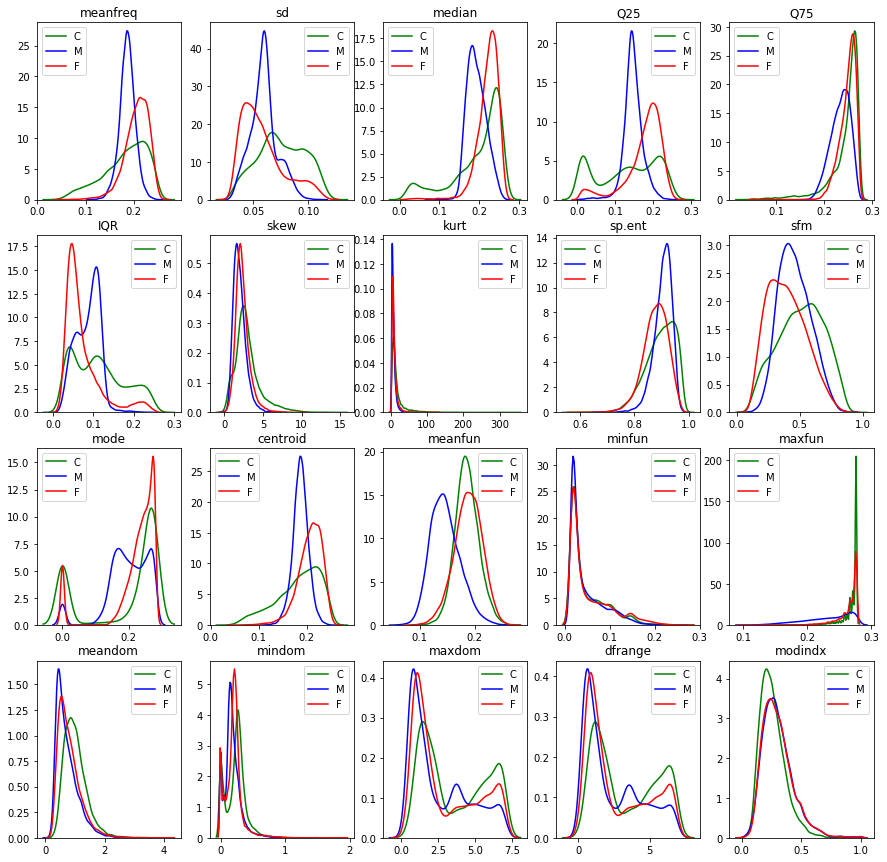

In [10]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df_train.columns[i-1])
    sns.kdeplot(df_train.loc[df_train['label'] == 0, df_train.columns[i-1]], color= 'green', label='C')
    sns.kdeplot(df_train.loc[df_train['label'] == 1, df_train.columns[i-1]], color= 'blue', label='M')
    sns.kdeplot(df_train.loc[df_train['label'] == 2, df_train.columns[i-1]], color= 'red', label='F')

In [11]:
# At first glance, most significant features are Q25, IQR and meanfun. 

x_train3 = df_train[["meanfun","IQR","Q25"]]
y_train3 = df_train["label"]
x_test3 = df_test[["meanfun","IQR","Q25"]]
y_test3 = df_test["label"]

In [12]:
def plot_cm(y_true, y_pred, desc = None):
    labels = ["child", "male", "female"]
    
    labeld = {0:'child', 1:'male', 2:'female'}
    y_true = [labeld[i] for i in y_true]
    y_pred = [labeld[i] for i in y_pred]

    mat = confusion_matrix(y_true, y_pred, labels=labels)
    accuracy = accuracy_score(y_true, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=labels,
                yticklabels=labels)
    if desc != None:
        plt.title('{}:{}'.format(desc, accuracy))
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.show()

In [13]:
#Producing X and y
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_train3 = np.array(x_train3)
y_train3 = np.array(y_train3)

X_test3 = np.array(x_test3)
y_test3 = np.array(y_test3)

In [14]:
def classify(model,x_train,y_train,x_test,y_test, desc):
    from sklearn.metrics import classification_report
    target_names = ["child", "female", "male"]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    plot_cm(y_test, y_pred, desc = desc)
    accuracy = model.score(x_test, y_test)
    print('Accuracy='+str(accuracy))
    
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [15]:
# K-Nearest Neighbors
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.289532293986637 occurs at k=6.


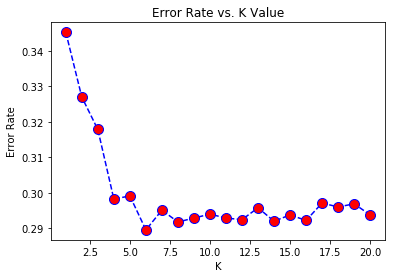

In [16]:
k=knn_error(21,X_train,y_train,X_test,y_test)

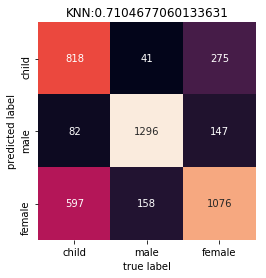

Accuracy=0.7104677060133631
              precision    recall  f1-score   support

       child     0.7213    0.5464    0.6218      1497
      female     0.8498    0.8669    0.8583      1495
        male     0.5877    0.7183    0.6464      1498

   micro avg     0.7105    0.7105    0.7105      4490
   macro avg     0.7196    0.7105    0.7088      4490
weighted avg     0.7195    0.7105    0.7088      4490



In [17]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,X_train,y_train,X_test,y_test, desc = 'KNN')

Lowest error is 0.3412026726057906 occurs at k=10.


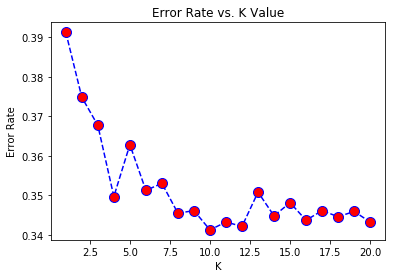

In [18]:
k=knn_error(21,X_train3,y_train3,X_test3,y_test3)

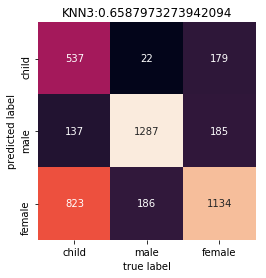

Accuracy=0.6587973273942094
              precision    recall  f1-score   support

       child     0.7276    0.3587    0.4805      1497
      female     0.7999    0.8609    0.8293      1495
        male     0.5292    0.7570    0.6229      1498

   micro avg     0.6588    0.6588    0.6588      4490
   macro avg     0.6856    0.6589    0.6442      4490
weighted avg     0.6855    0.6588    0.6441      4490



In [19]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,X_train3,y_train3,X_test3,y_test3, desc = 'KNN3')

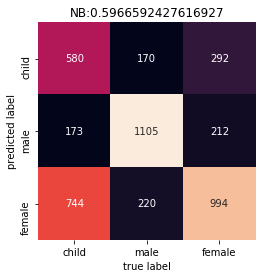

Accuracy=0.5966592427616927
              precision    recall  f1-score   support

       child     0.5566    0.3874    0.4569      1497
      female     0.7416    0.7391    0.7404      1495
        male     0.5077    0.6636    0.5752      1498

   micro avg     0.5967    0.5967    0.5967      4490
   macro avg     0.6020    0.5967    0.5908      4490
weighted avg     0.6019    0.5967    0.5908      4490



In [20]:
# Naive Bayes
model=naive_bayes.GaussianNB()
classify(model,X_train,y_train,X_test,y_test, desc = "NB")

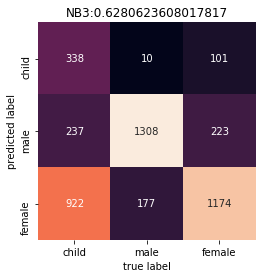

Accuracy=0.6280623608017817
              precision    recall  f1-score   support

       child     0.7528    0.2258    0.3474      1497
      female     0.7398    0.8749    0.8017      1495
        male     0.5165    0.7837    0.6226      1498

   micro avg     0.6281    0.6281    0.6281      4490
   macro avg     0.6697    0.6281    0.5906      4490
weighted avg     0.6696    0.6281    0.5905      4490



In [21]:
model=naive_bayes.GaussianNB()
classify(model,X_train3,y_train3,X_test3,y_test3, desc = "NB3")

In [22]:
# Decision Tree
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.3518930957683742 occurs at n=9.


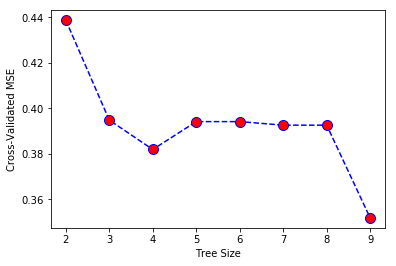

In [23]:
n=dt_error(10,X_train,y_train,X_test,y_test)

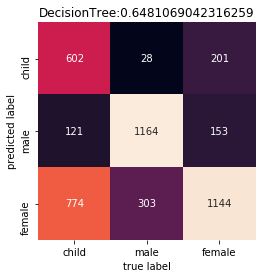

Accuracy=0.6481069042316259
              precision    recall  f1-score   support

       child     0.7244    0.4021    0.5172      1497
      female     0.8095    0.7786    0.7937      1495
        male     0.5151    0.7637    0.6152      1498

   micro avg     0.6481    0.6481    0.6481      4490
   macro avg     0.6830    0.6481    0.6420      4490
weighted avg     0.6829    0.6481    0.6420      4490



In [24]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,X_train,y_train,X_test,y_test, desc = 'DecisionTree')

Lowest error is 0.3438752783964365 occurs at n=12.


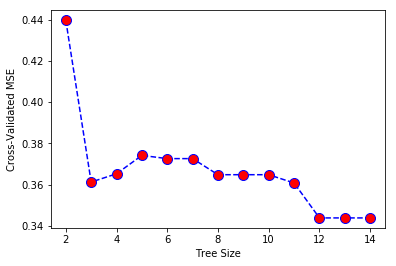

In [25]:
n=dt_error(15,X_train3,y_train3,X_test3,y_test3)

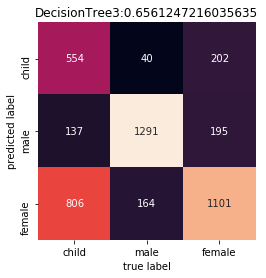

Accuracy=0.6561247216035635
              precision    recall  f1-score   support

       child     0.6960    0.3701    0.4832      1497
      female     0.7954    0.8635    0.8281      1495
        male     0.5316    0.7350    0.6170      1498

   micro avg     0.6561    0.6561    0.6561      4490
   macro avg     0.6743    0.6562    0.6428      4490
weighted avg     0.6743    0.6561    0.6427      4490



In [26]:
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,X_train3,y_train3,X_test3,y_test3, desc = 'DecisionTree3')

In [27]:
# Random Forest
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.2795100222717149 occurs at n=81.


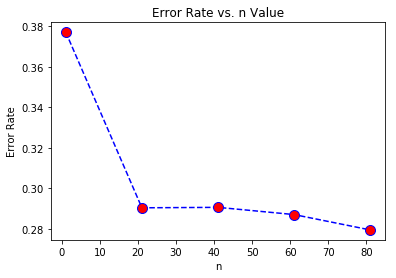

In [28]:
e=rf_error(100,X_train,y_train,X_test,y_test)

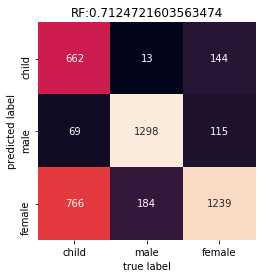

Accuracy=0.7124721603563474
              precision    recall  f1-score   support

       child     0.8083    0.4422    0.5717      1497
      female     0.8758    0.8682    0.8720      1495
        male     0.5660    0.8271    0.6721      1498

   micro avg     0.7125    0.7125    0.7125      4490
   macro avg     0.7501    0.7125    0.7053      4490
weighted avg     0.7500    0.7125    0.7052      4490



In [29]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,X_train,y_train,X_test,y_test,desc="RF")

Lowest error is 0.33853006681514475 occurs at n=61.


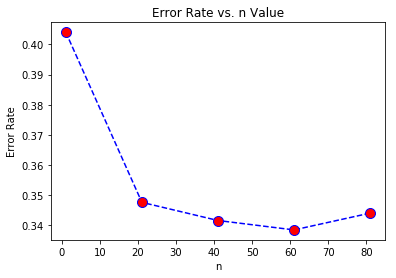

In [30]:
e=rf_error(100,X_train3,y_train3,X_test3,y_test3)

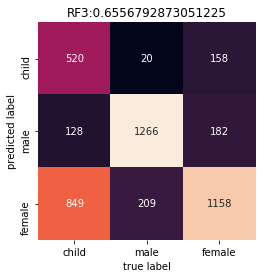

Accuracy=0.6556792873051225
              precision    recall  f1-score   support

       child     0.7450    0.3474    0.4738      1497
      female     0.8033    0.8468    0.8245      1495
        male     0.5226    0.7730    0.6236      1498

   micro avg     0.6557    0.6557    0.6557      4490
   macro avg     0.6903    0.6557    0.6406      4490
weighted avg     0.6902    0.6557    0.6405      4490



In [31]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,X_train3,y_train3,X_test3,y_test3,desc="RF3")

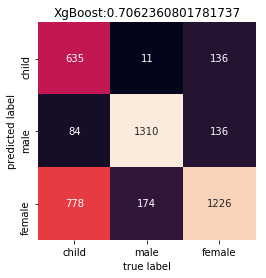

Accuracy=0.7062360801781737
              precision    recall  f1-score   support

       child     0.8120    0.4242    0.5573      1497
      female     0.8562    0.8763    0.8661      1495
        male     0.5629    0.8184    0.6670      1498

   micro avg     0.7062    0.7062    0.7062      4490
   macro avg     0.7437    0.7063    0.6968      4490
weighted avg     0.7436    0.7062    0.6967      4490



In [32]:
# XgBoost
model = xgboost.XGBClassifier()
classify(model,X_train,y_train,X_test,y_test,desc="XgBoost")

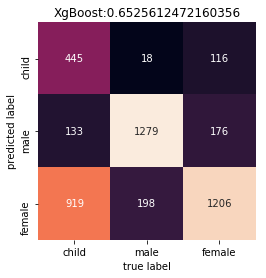

Accuracy=0.6525612472160356
              precision    recall  f1-score   support

       child     0.7686    0.2973    0.4287      1497
      female     0.8054    0.8555    0.8297      1495
        male     0.5192    0.8051    0.6312      1498

   micro avg     0.6526    0.6526    0.6526      4490
   macro avg     0.6977    0.6526    0.6299      4490
weighted avg     0.6976    0.6526    0.6298      4490



In [33]:
model = xgboost.XGBClassifier()
classify(model,X_train3,y_train3,X_test3,y_test3,desc="XgBoost")

In [35]:
# Support Vector Machine
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [36]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [38]:
k=svm_kernel(X_train,y_train,X_test,y_test)

C:\Users\Max\Anaconda3\envs\torch\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf  in-sample accuracy in SVM:  0.7377125411940721
rbf  out-of-sample accuracy in SVM:  0.6561247216035635


C:\Users\Max\Anaconda3\envs\torch\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


poly  in-sample accuracy in SVM:  0.7205070661733487
poly  out-of-sample accuracy in SVM:  0.6334075723830735
linear  in-sample accuracy in SVM:  0.7287155536685469
linear  out-of-sample accuracy in SVM:  0.657683741648107
Highest accuracy is 0.657683741648107 occurs at linear kernel.


Lowest error is 0.3423162583518931 occurs at C=1.


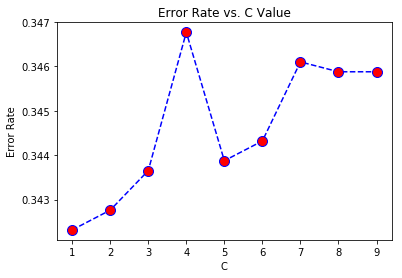

In [39]:
c=svm_error(k,10,X_train,y_train,X_test,y_test)

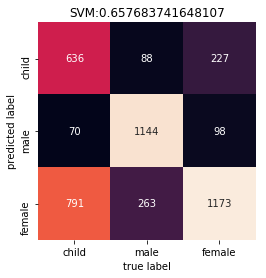

Accuracy=0.657683741648107
              precision    recall  f1-score   support

       child     0.6688    0.4248    0.5196      1497
      female     0.8720    0.7652    0.8151      1495
        male     0.5267    0.7830    0.6298      1498

   micro avg     0.6577    0.6577    0.6577      4490
   macro avg     0.6891    0.6577    0.6548      4490
weighted avg     0.6890    0.6577    0.6548      4490



In [41]:
model=svm.SVC(kernel=k,C=c)
classify(model,X_train,y_train,X_test,y_test, desc='SVM')

In [42]:
k=svm_kernel(X_train3,y_train3,X_test3,y_test3)

C:\Users\Max\Anaconda3\envs\torch\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf  in-sample accuracy in SVM:  0.6874507187481046
rbf  out-of-sample accuracy in SVM:  0.610913140311804


C:\Users\Max\Anaconda3\envs\torch\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


poly  in-sample accuracy in SVM:  0.4741513515699238
poly  out-of-sample accuracy in SVM:  0.333630289532294
linear  in-sample accuracy in SVM:  0.6869452700107155
linear  out-of-sample accuracy in SVM:  0.6118040089086859
Highest accuracy is 0.6118040089086859 occurs at linear kernel.


Lowest error is 0.38819599109131403 occurs at C=1.


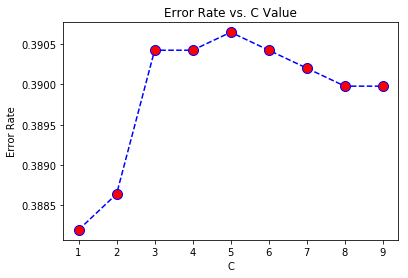

In [43]:
c=svm_error(k,10,X_train3,y_train3,X_test3,y_test3)

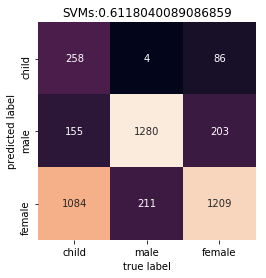

Accuracy=0.6118040089086859
              precision    recall  f1-score   support

       child     0.7414    0.1723    0.2797      1497
      female     0.7814    0.8562    0.8171      1495
        male     0.4828    0.8071    0.6042      1498

   micro avg     0.6118    0.6118    0.6118      4490
   macro avg     0.6685    0.6119    0.5670      4490
weighted avg     0.6685    0.6118    0.5669      4490



In [44]:
model=svm.SVC(kernel=k,C=c)
classify(model,X_train3,y_train3,X_test3,y_test3, desc='SVMs')

In [45]:
# Neural Network
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.27928730512249444 occurs at C=18.


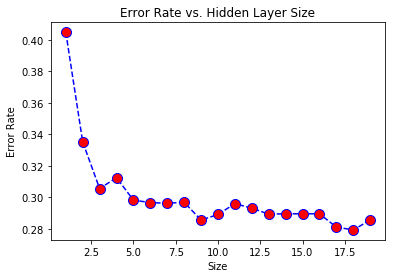

In [46]:
h=nn_error(20,X_train,y_train,X_test,y_test)

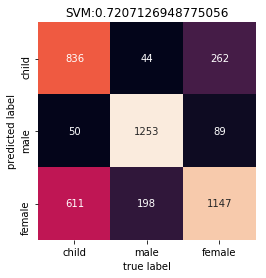

Accuracy=0.7207126948775056
              precision    recall  f1-score   support

       child     0.7320    0.5585    0.6336      1497
      female     0.9001    0.8381    0.8680      1495
        male     0.5864    0.7657    0.6642      1498

   micro avg     0.7207    0.7207    0.7207      4490
   macro avg     0.7395    0.7208    0.7219      4490
weighted avg     0.7394    0.7207    0.7218      4490



In [47]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,X_train,y_train,X_test,y_test, desc='SVM')

Lowest error is 0.34766146993318486 occurs at C=11.


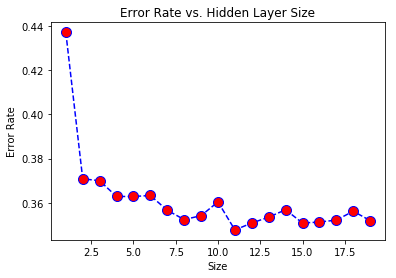

In [48]:
h=nn_error(20,X_train3,y_train3,X_test3,y_test3)

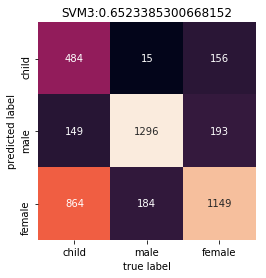

Accuracy=0.6523385300668152
              precision    recall  f1-score   support

       child     0.7389    0.3233    0.4498      1497
      female     0.7912    0.8669    0.8273      1495
        male     0.5230    0.7670    0.6219      1498

   micro avg     0.6523    0.6523    0.6523      4490
   macro avg     0.6844    0.6524    0.6330      4490
weighted avg     0.6843    0.6523    0.6329      4490



In [49]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,X_train3,y_train3,X_test3,y_test3, desc='SVM3')